In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
df_train = pd.read_csv('../input/nlp-getting-started/train.csv')


In [3]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


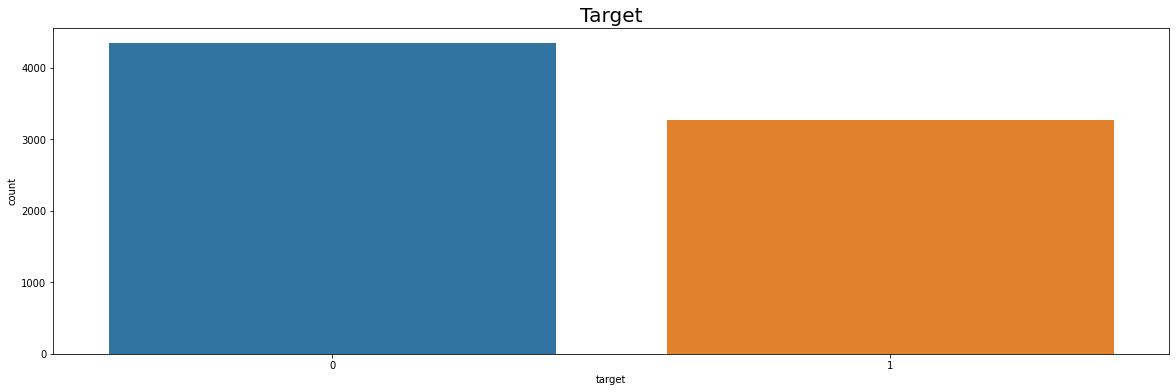

In [4]:
plt.figure(figsize=(20, 6))

sns.countplot(df_train['target'])
plt.title("Target", fontsize=20)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


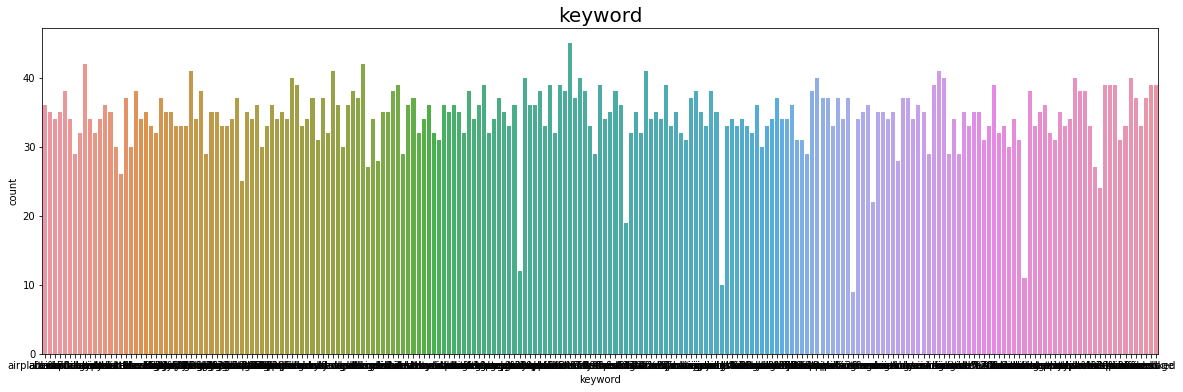

In [5]:
plt.figure(figsize=(20, 6))

sns.countplot(df_train['keyword'])
plt.title("keyword", fontsize=20)

plt.show()

In [6]:
len(df_train)

7613

In [7]:
for i in range(len(df_train['text'])):
    if 'death' in df_train['text'][i]:
        print('death found in ' + str(i))
    #s =df_train['text'][i]
    #index = s.find("death")
    #print(index)

death found in 393
death found in 718
death found in 1260
death found in 1579
death found in 1891
death found in 2089
death found in 2091
death found in 2096
death found in 2099
death found in 2101
death found in 2102
death found in 2103
death found in 2104
death found in 2105
death found in 2107
death found in 2108
death found in 2110
death found in 2111
death found in 2114
death found in 2115
death found in 2117
death found in 2118
death found in 2120
death found in 2121
death found in 2122
death found in 2123
death found in 2124
death found in 2125
death found in 2126
death found in 2127
death found in 2128
death found in 2130
death found in 2131
death found in 2132
death found in 2133
death found in 2134
death found in 2135
death found in 2136
death found in 2137
death found in 2138
death found in 2139
death found in 2142
death found in 2143
death found in 2148
death found in 2150
death found in 2151
death found in 2152
death found in 2153
death found in 2154
death found in 2155
de

In [8]:
#df_train['text'].values.tolist()
df_train['text'].unique()

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'Suicide bomber kills 15 in Saudi security site mosque - Reuters via World - Google News - Wall ... http://t.co/nF4IculOje',
       'Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

In [9]:
df_train.sort_values(by="target", ascending=False, inplace=True)

In [10]:
df_train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4069,5783,forest%20fires,NaN,When ur friend and u are talking about forest ...,1
4067,5780,forest%20fires,"Lansdale,Pennsylvania",U.S. Forest Service says spending more than ha...,1
4066,5778,forest%20fires,"Vancouver, BC",Forest fires could delay @AbbyAirshow but offi...,1
4065,5777,forest%20fires,"Portland, Oregon",Inciweb OR Update: Rogue River-Siskiyou Natio...,1
4064,5776,forest%20fires,Based in CA - Serve Nationwide,Property losses from northern California wildf...,1
4063,5775,forest%20fires,NaN,U.S. Forest Service says spending more than ha...,1
4062,5772,forest%20fires,NaN,CLIMATE CONSEQUENCES: U.S. Forest Service Says...,1
4060,5769,forest%20fires,NaN,#HeartDisease U.S. Forest Service says spendin...,1
4059,5766,forest%20fires,Duncan,@BlueJays @Braves @Angels Instead of dumping w...,1
